# Convert from XML yo CSV

In [10]:
!pip install pandas
!pip install scikit-image
!pip install matplotlib
!pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp39-cp39-macosx_12_0_arm64.whl (6.9 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [15]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [16]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for member in root.findall('object'):
            value = ('images/'+root.find('filename').text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text),
                     member[0].text,
                     )
            xml_list.append(value)
    column_name = ['filename', 'xmin','ymin','xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


In [17]:
image_path = os.path.join(os.getcwd(), 'images/')
dataset_df = xml_to_csv(image_path)
print('Completed')

Completed


In [24]:
dataset_df[dataset_df['filename'] == 'images/0.png']

,filename,xmin,ymin,xmax,ymax,class
226,images/0.png,156,32,224,168,left


# Show Dataset

In [18]:
import skimage.io as io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.patches as patches

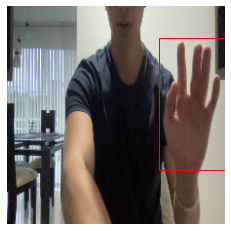

In [25]:
def showObjects(image_df):

    img_path = image_df.filename

    image = io.imread(img_path)
    draw = image.copy()
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(draw)
    rect = patches.Rectangle((image_df.xmin,image_df.ymin),image_df.xmax-image_df.xmin,image_df.ymax-image_df.ymin,linewidth=1,edgecolor='r',facecolor='none')

    plt.axis('off')
    ax.add_patch(rect)
    plt.show()

showObjects(dataset_df.iloc[226])

# Train-Test Split

In [20]:
train_df, test_df = train_test_split(
  dataset_df, 
  test_size=0.2, 
  random_state=2
)

# Create csv files

In [21]:
train_df.to_csv('annotations.csv', index=False, header=None)
test_df.to_csv('annotations_test.csv', index=False, header=None)

classes = set(['right', 'left'])

with open('classes.csv', 'w') as f:
    for i, line in enumerate(sorted(classes)):
        f.write('{},{}\n'.format(line,i))